In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/data

/content/drive/MyDrive/data


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from IPython.core.debugger import set_trace
import time
import os

In [4]:
# Load and clean the data
OILDATA = pd.read_excel("Crude_Oil_Prices_Daily.xlsx")

In [5]:
OILDATA.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [6]:
OILDATA.tail()

,Date,Closing Value
9359,2022-12-26,79.56
9360,2022-12-27,79.87
9361,2022-12-28,78.96
9362,2022-12-29,78.71
9363,2022-12-30,80.51


In [7]:
print(OILDATA.isnull().sum())

Date             0
Closing Value    7
dtype: int64


In [8]:
OILDATA.shape

(9364, 2)

In [9]:
OILDATA.nunique()

Date             9364
Closing Value    5298
dtype: int64

In [10]:
OILDATA.dtypes

Date             datetime64[ns]
Closing Value           float64
dtype: object

In [11]:
OILDATA.describe()

,Closing Value
count,9357.000000
mean,46.132948
std,29.570523
min,10.250000
25%,20.020000
50%,36.210000
75%,67.240000
max,145.310000


In [12]:
OILDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9364 entries, 0 to 9363
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9364 non-null   datetime64[ns]
 1   Closing Value  9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.4 KB


In [13]:
new_OILDATA=OILDATA.dropna()

In [14]:
new_OILDATA

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9359,2022-12-26,79.56
9360,2022-12-27,79.87
9361,2022-12-28,78.96
9362,2022-12-29,78.71


In [15]:
new_OILDATA.set_index("Date",inplace=True)

In [16]:
new_OILDATA.shape

(9357, 1)

In [17]:
new_OILDATA.describe()

,Closing Value
count,9357.000000
mean,46.132948
std,29.570523
min,10.250000
25%,20.020000
50%,36.210000
75%,67.240000
max,145.310000


In [18]:
new_OILDATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 1986-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Value  9357 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [19]:
OILDATA["Date"] = pd.to_datetime(OILDATA["Date"], format="%d-%m-%Y")
OILDATA["month"] = OILDATA.Date.dt.strftime("%b")
OILDATA["year"] = OILDATA.Date.dt.strftime("%y")

In [20]:
OILDATA.head(10)

,Date,Closing Value,month,year
0,1986-01-02,25.56,Jan,86
1,1986-01-03,26.00,Jan,86
2,1986-01-06,26.53,Jan,86
3,1986-01-07,25.85,Jan,86
4,1986-01-08,25.87,Jan,86
5,1986-01-09,26.03,Jan,86
6,1986-01-10,25.65,Jan,86
7,1986-01-13,25.08,Jan,86
8,1986-01-14,24.97,Jan,86
9,1986-01-15,25.18,Jan,86


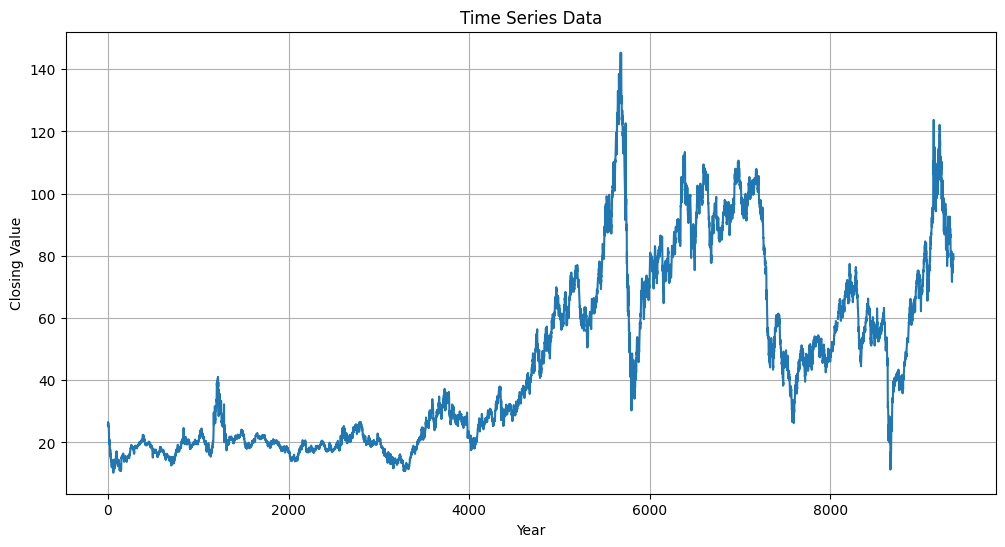

In [21]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(OILDATA.index, OILDATA['Closing Value'])
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.grid(True)
plt.show()

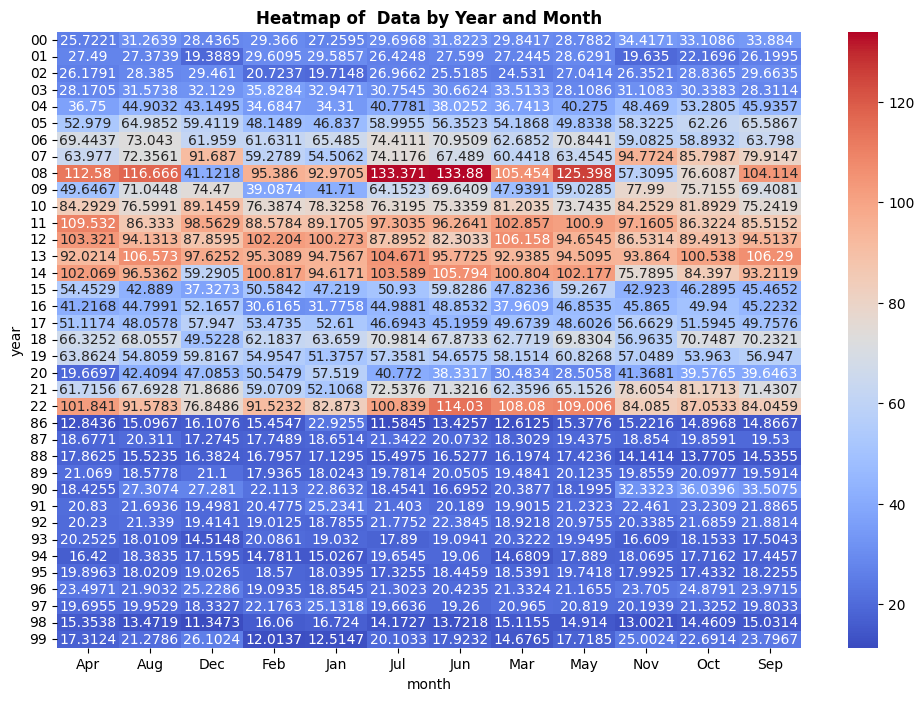

In [22]:
# Create a pivot table for the heatmap
pivot_data = pd.pivot_table(data=OILDATA,index='year', columns='month', values='Closing Value', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='g',cbar=True)
plt.title('Heatmap of  Data by Year and Month',fontweight='bold')
plt.show()


In [23]:
NEW_OILDATA=pd.DataFrame(new_OILDATA)
NEW_OILDATA.rename(columns={"Closing Value":"Closing_Value",},inplace=True)
print(NEW_OILDATA.columns)

Index(['Closing_Value'], dtype='object')


<Axes: ylabel='Density'>

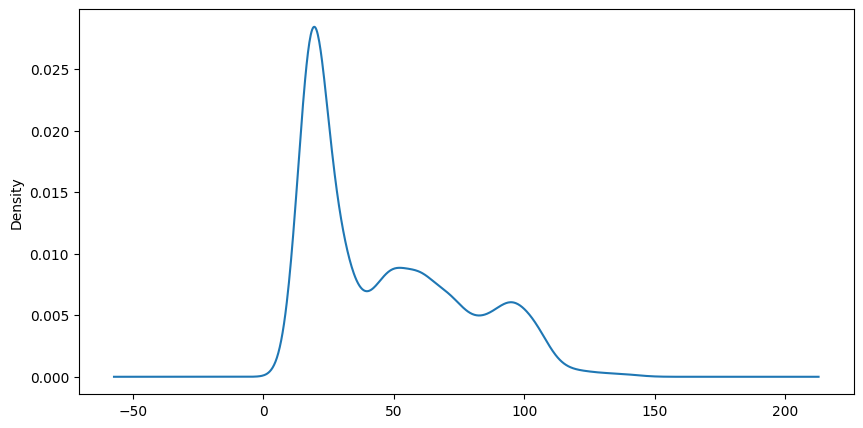

In [24]:
NEW_OILDATA.Closing_Value.plot(kind="kde",figsize=(10,5))

<Axes: >

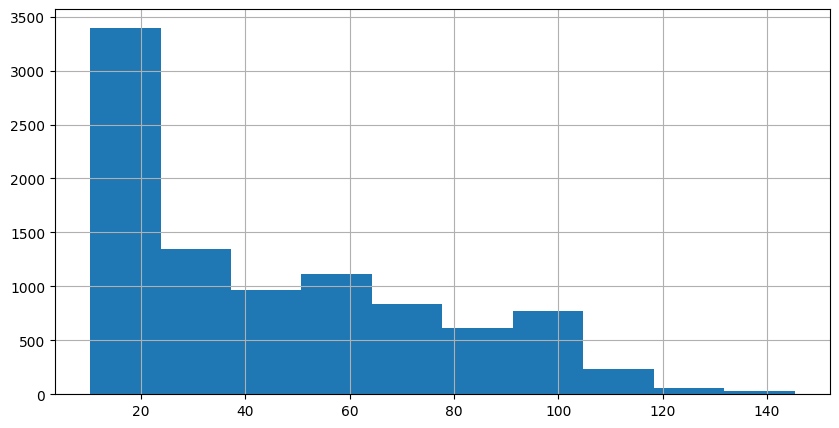

In [25]:
NEW_OILDATA.Closing_Value.hist(figsize=(10,5))

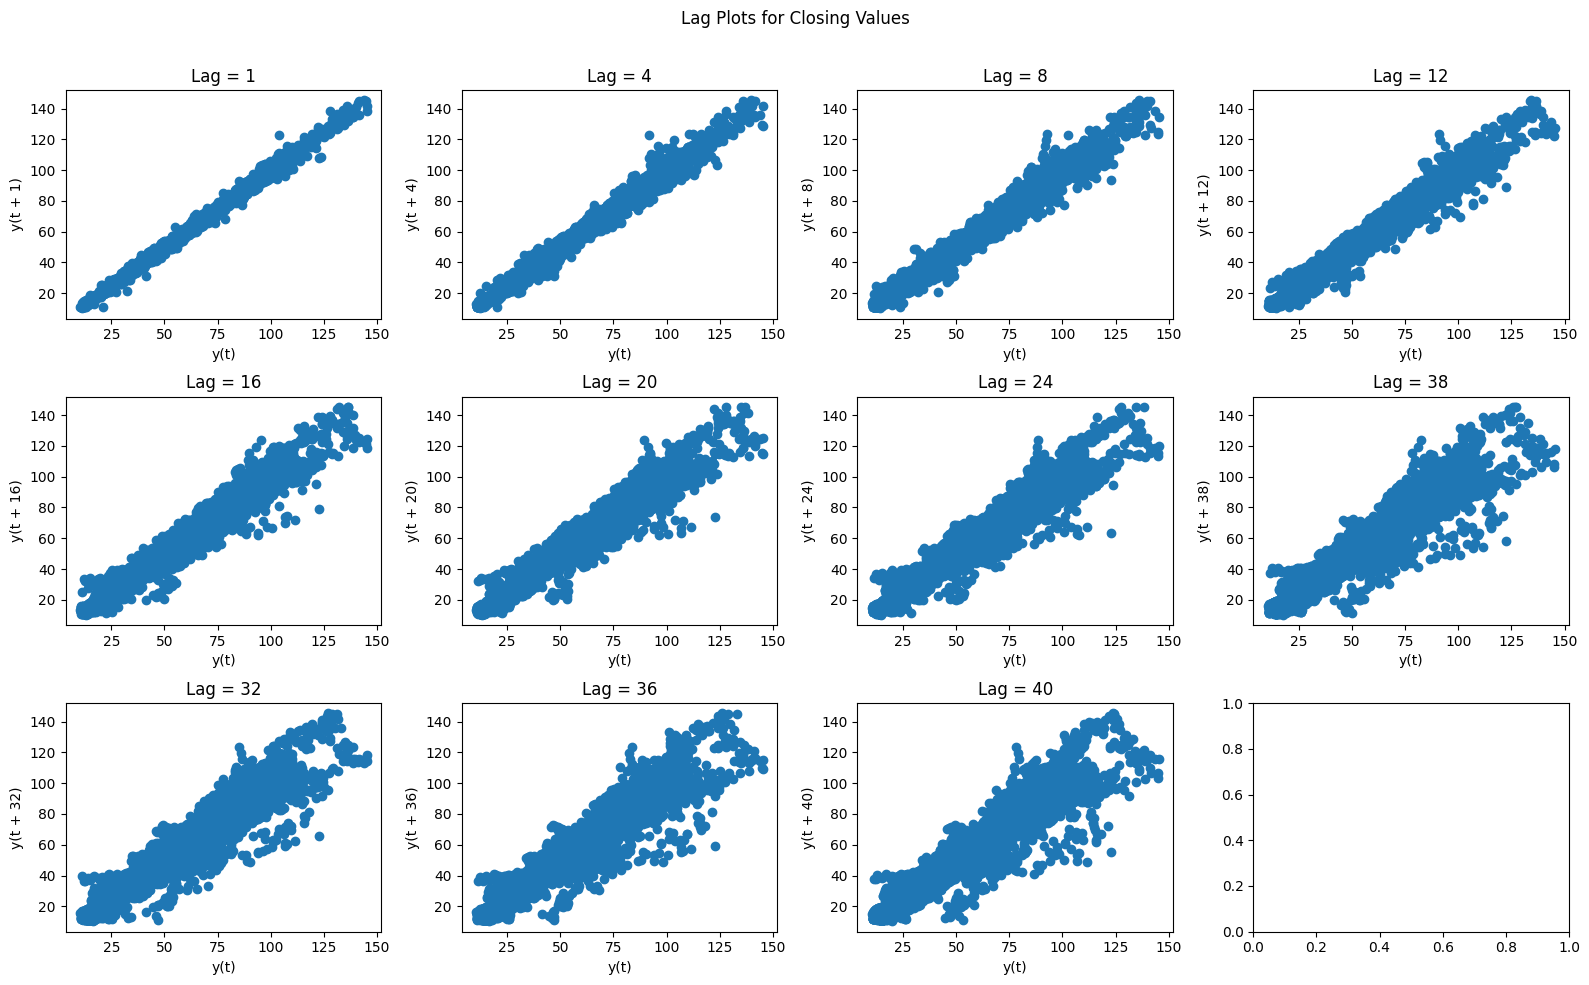

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

#  new_OILDATA is DataFrame

lag_values = [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]

# Create a subplot for each lag value
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
fig.suptitle("Lag Plots for Closing Values")

for lag, ax in zip(lag_values, axes.flatten()):
    lag_plot(new_OILDATA.Closing_Value, lag=lag, ax=ax)
    ax.set_title(f"Lag = {lag}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title's position
plt.show()

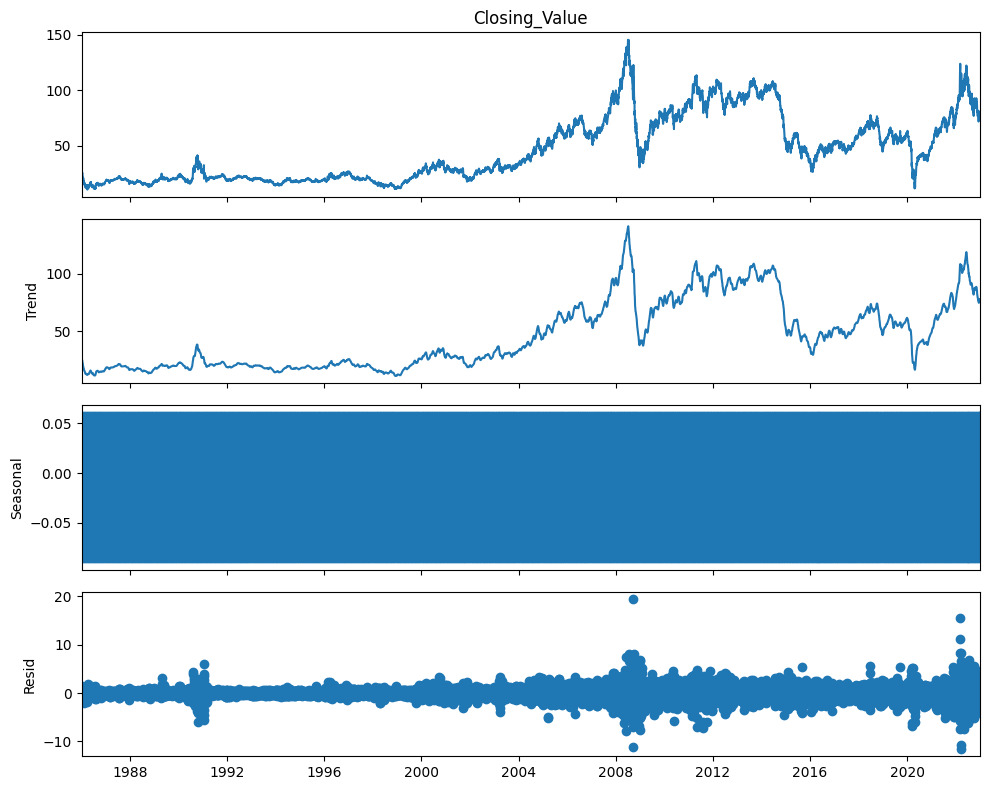

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decompose_ts_add = seasonal_decompose(new_OILDATA.Closing_Value, period=12)

# Use the correct rc_context
with plt.rc_context(rc={'figure.figsize': (10,8)}):
    decompose_ts_add.plot()
    plt.show()


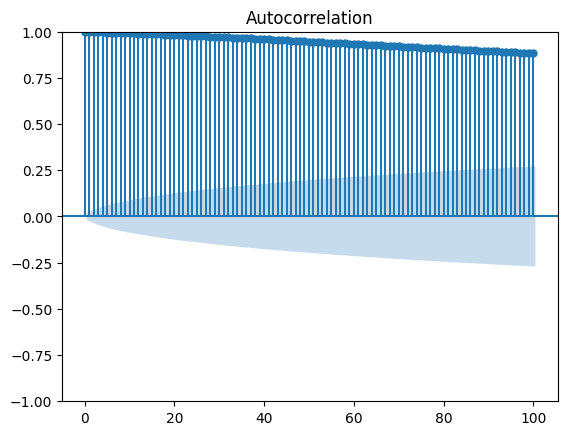

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(new_OILDATA.Closing_Value, lags=100)
plt.title('Autocorrelation')
plt.show()

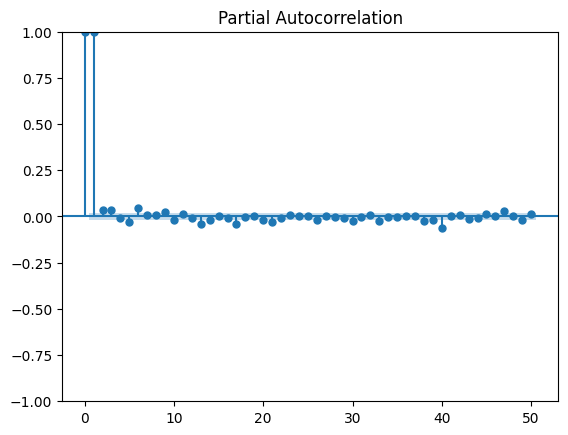

In [29]:
plot_pacf(new_OILDATA.Closing_Value, lags=50)
plt.title('Partial Autocorrelation')
plt.show()

In [30]:
OILDATA = new_OILDATA

In [31]:
OILDATA.Closing_Value.resample("M").mean()

Date
1986-01-31    22.925455
1986-02-28    15.454737
1986-03-31    12.612500
1986-04-30    12.843636
1986-05-31    15.377619
                ...    
2022-08-31    91.578261
2022-09-30    84.045909
2022-10-31    87.053333
2022-11-30    84.085000
2022-12-31    76.848636
Freq: M, Name: Closing_Value, Length: 444, dtype: float64

In [32]:
OILDATA.shape

(9357, 1)

In [33]:
OILDATA.head()

,Closing_Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [34]:
OILDATA["month"] = OILDATA.index.strftime("%b") #month extraction
OILDATA["year"] = OILDATA.index.strftime("%Y") #year extraction

In [35]:
df_dummies=pd.DataFrame(pd.get_dummies(OILDATA["month"])) #creating monthly dummy variables to help in model building process
OILDATA=pd.concat([OILDATA,df_dummies],axis= 1)
OILDATA

,Closing_Value,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,
1986-01-02,25.56,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1986-01-03,26.00,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1986-01-06,26.53,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1986-01-07,25.85,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1986-01-08,25.87,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,79.56,Dec,2022,0,0,1,0,0,0,0,0,0,0,0,0
2022-12-27,79.87,Dec,2022,0,0,1,0,0,0,0,0,0,0,0,0
2022-12-28,78.96,Dec,2022,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
t=np.arange(1,9358)                                             #Creating variables that will help in the model building process
OILDATA["t"] = t
OILDATA["t_sq"] = OILDATA["t"]*OILDATA["t"]
OILDATA["log_Closing_value"]=np.log(OILDATA["Closing_Value"])

In [37]:
def create_features(OILDATA):
    """
    Create time series features based on time series index.
    """
    OILDATA = OILDATA.copy()
    OILDATA['dayofweek'] = OILDATA.index.dayofweek
    OILDATA['quarter'] = OILDATA.index.quarter
    OILDATA['month'] = OILDATA.index.month
    OILDATA['year'] = OILDATA.index.year
    OILDATA['dayofyear'] = OILDATA.index.dayofyear
    OILDATA['dayofmonth'] = OILDATA.index.day
    OILDATA['weekofyear'] = OILDATA.index.isocalendar().week
    return OILDATA

OILDATA = create_features(OILDATA)

In [38]:
OILDATA.head()


,Closing_Value,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,Oct,Sep,t,t_sq,log_Closing_value,dayofweek,quarter,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
1986-01-02,25.56,1,1986,0,0,0,0,1,0,0,...,0,0,1,1,3.241029,3,1,2,2,1
1986-01-03,26.00,1,1986,0,0,0,0,1,0,0,...,0,0,2,4,3.258097,4,1,3,3,1
1986-01-06,26.53,1,1986,0,0,0,0,1,0,0,...,0,0,3,9,3.278276,0,1,6,6,2
1986-01-07,25.85,1,1986,0,0,0,0,1,0,0,...,0,0,4,16,3.252311,1,1,7,7,2
1986-01-08,25.87,1,1986,0,0,0,0,1,0,0,...,0,0,5,25,3.253084,2,1,8,8,2


<function matplotlib.pyplot.show(close=None, block=None)>

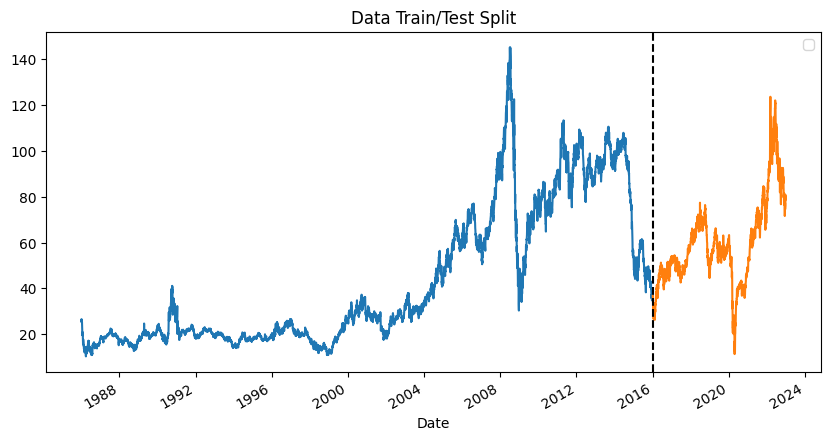

In [39]:
train = OILDATA.loc[OILDATA.index < "01-01-2016"]
test = OILDATA.loc[OILDATA.index >= "01-01-2016"]

#Visualizing the data in it's train/test split format
fig,ax = plt.subplots(figsize=(10,5))
train.plot(ax=ax,y="Closing_Value",label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax,y="Closing_Value",label="Testing Set")
ax.axvline("01-01-2016", color="black", ls="--")
ax.legend("Training Set","Testing Set")
plt.show

In [40]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Closing_Value'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [41]:
import statsmodels.formula.api as smf #importing package for performing model building

In [42]:
#Linear Model

linear_model = smf.ols("Closing_Value~t",data=train).fit()
pred_linear = pd.Series(linear_model.predict(test["t"]))
rmse_linear = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(pred_linear))**2))
rmse_linear #39.9075

39.90751611146862

In [43]:
#Exponential model

Exp = smf.ols("log_Closing_value~t",data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test["t"])))
rmse_Exp = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp  #62.0265

62.02659522629936

In [44]:
#Quadratic model

Quad = smf.ols("Closing_Value~t+t_sq",data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(pred_Quad))**2))
rmse_Quad  #67.1557

67.15570064574001

In [45]:
#Additive seasonality (monthly)

add_seam = smf.ols("Closing_Value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_seam = pd.Series(add_seam.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
rmse_add_seam = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(pred_add_seam))**2))
rmse_add_seam #25.5868

25.586827086121087

In [46]:
#Additive seasonality quadratic (monthly)

add_seamq = smf.ols("Closing_Value~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_seamq = pd.Series(add_seamq.predict(test[["t","t_sq","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
rmse_add_seamq = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(pred_add_seamq))**2))
rmse_add_seamq #67.2049

67.2049026798212

In [47]:
#Multiplicative Seasonality (monthly)

Mul_seam = smf.ols("log_Closing_value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_Mult_seam = pd.Series(Mul_seam.predict(test))
rmse_Mult_seam = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(np.exp(pred_Mult_seam)))**2))
rmse_Mult_seam   #32.3637

32.36372526462593

In [48]:
#Multiplicative Additive Seasonality (monthly)

Mul_Add_seam = smf.ols("log_Closing_value~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_Mult_add_seam = pd.Series(Mul_Add_seam.predict(test))
rmse_Mult_add_seam = np.sqrt(np.mean((np.array(test["Closing_Value"])-np.array(np.exp(pred_Mult_add_seam)))**2))
rmse_Mult_add_seam   #62.1359

62.13597063760601

**ARIMA Model**

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
test_result = adfuller(new_OILDATA["Closing_Value"])

In [51]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(Closing_Value):
    result = adfuller(Closing_Value)
    labels = ["ADF test statistic", "p-value", "lags used", "Number of observations used"]

    for value, label in zip(result, labels):
        print(label + ": " + str(value))

    if result[1] <= 0.05:
        print("Strong Evidence Against H0: Reject null hypothesis, Data has no unit root and is stationary")
    else:
        print("Weak Evidence Against H0: Time series has a unit root and is non-stationary")

# We  have a DataFrame new_OILDATA with a Closing_Value column
adfuller_test(new_OILDATA['Closing_Value'])

ADF test statistic: -2.0014657339751256
p-value: 0.28593079594139664
lags used: 16
Number of observations used: 9340
Weak Evidence Against H0: Time series has a unit root and is non-stationary


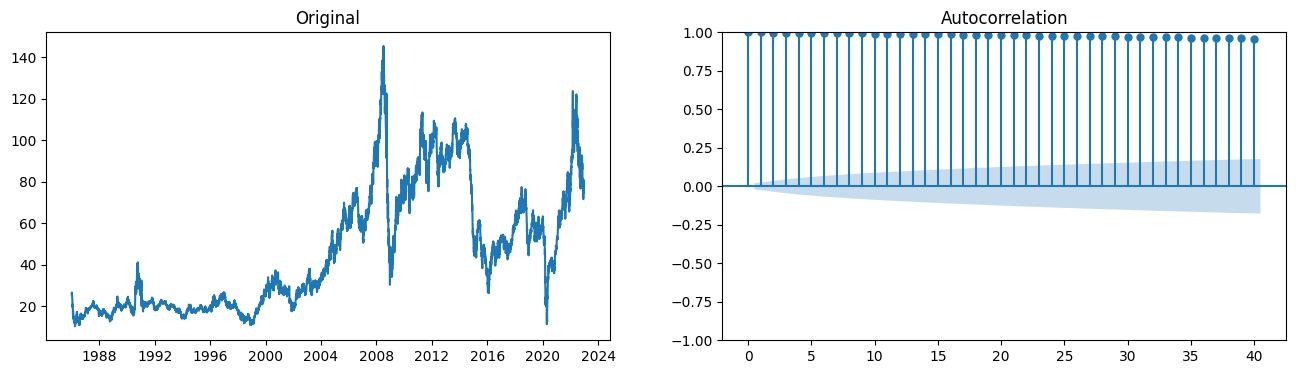

In [52]:
#Creating a visual representation of the data and the autocorrelation plot

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(OILDATA.Closing_Value)
ax1.set_title("Original")

plot_acf(OILDATA.Closing_Value,ax=ax2);

In [53]:
!pip install pmdarima

from pmdarima.arima.utils import ndiffs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00


In [54]:
ndiffs(OILDATA.Closing_Value,test="adf")

1

In [55]:
arima_orders = [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]

model = ARIMA(OILDATA.Closing_Value,order=(3,1,3))
result = model.fit()

In [56]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing_Value   No. Observations:                 9357
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -15431.152
Date:                Thu, 02 Nov 2023   AIC                          30876.305
Time:                        15:45:43   BIC                          30926.311
Sample:                             0   HQIC                         30893.288
                               - 9357                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2612      0.069    -18.379      0.000      -1.396      -1.127
ar.L2         -0.9522      0.073    -12.988      0.000      -1.096      -0.808
ar.L3         -0.2450      0.062     -3.932      0.0

(array([7.99612914e-05, 3.99806457e-04, 6.45021084e-03, 2.24797844e-01,
        1.71383701e-02, 4.53113985e-04, 2.66537638e-05, 0.00000000e+00,
        2.66537638e-05, 2.66537638e-05]),
 array([-14.53634863, -10.52671377,  -6.51707891,  -2.50744404,
          1.50219082,   5.51182568,   9.52146055,  13.53109541,
         17.54073027,  21.55036514,  25.56      ]),
 <BarContainer object of 10 artists>)

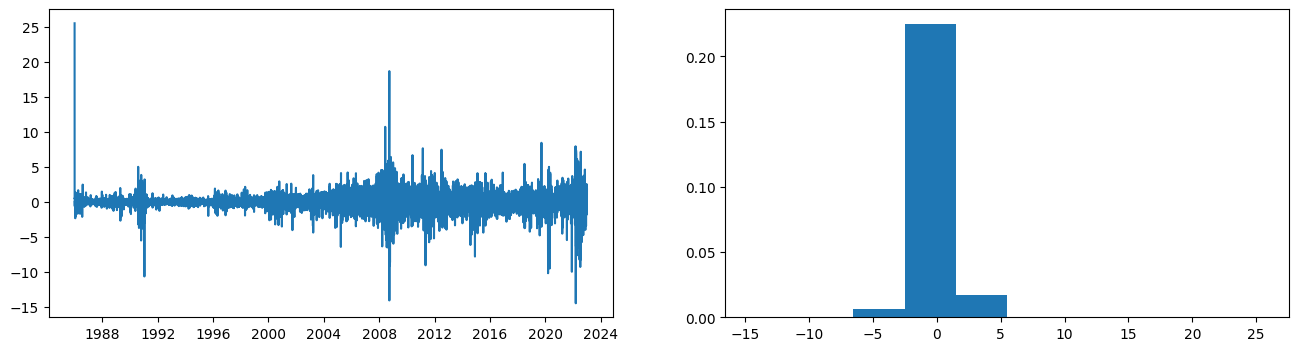

In [57]:
residuals = pd.DataFrame(result.resid)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals,density=True)

In [58]:
results = result.predict(start=1,end=9000,dynamic=False)

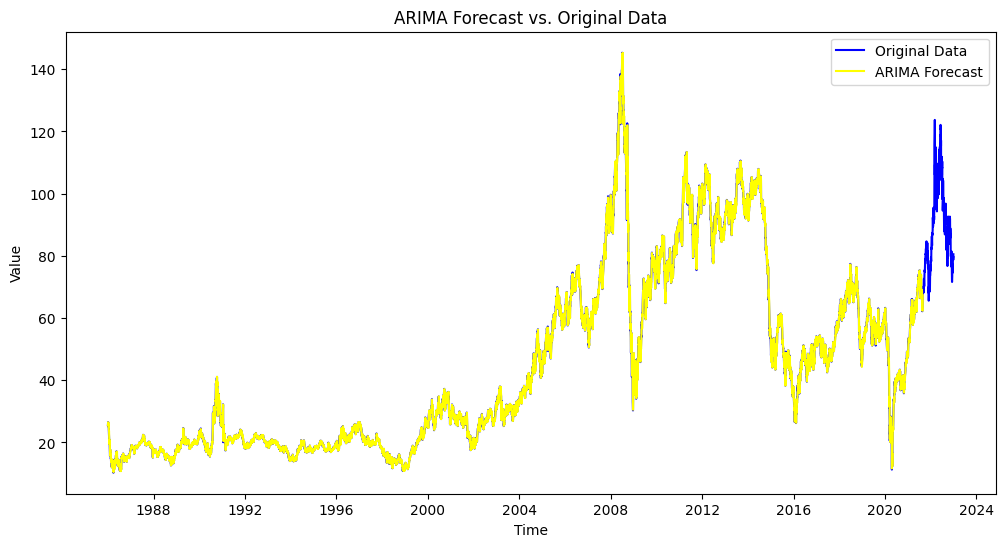

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(OILDATA.Closing_Value, label='Original Data', color='blue')
plt.plot(results, label='ARIMA Forecast', color='YELLOW')
plt.title('ARIMA Forecast vs. Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [60]:
xgoil = new_OILDATA

xgoil["target"] = xgoil.Closing_Value.shift(-1) #creating a target variable required for model building
xgoil.head

<bound method NDFrame.head of             Closing_Value month  year  target
Date                                         
1986-01-02          25.56   Jan  1986   26.00
1986-01-03          26.00   Jan  1986   26.53
1986-01-06          26.53   Jan  1986   25.85
1986-01-07          25.85   Jan  1986   25.87
1986-01-08          25.87   Jan  1986   26.03
...                   ...   ...   ...     ...
2022-12-26          79.56   Dec  2022   79.87
2022-12-27          79.87   Dec  2022   78.96
2022-12-28          78.96   Dec  2022   78.71
2022-12-29          78.71   Dec  2022   80.51
2022-12-30          80.51   Dec  2022     NaN

[9357 rows x 4 columns]>

In [61]:
xgoil.drop(xgoil.columns[[1,2]],axis=1,inplace=True) #dropping the unnecessary columns
xgoil.head

<bound method NDFrame.head of             Closing_Value  target
Date                             
1986-01-02          25.56   26.00
1986-01-03          26.00   26.53
1986-01-06          26.53   25.85
1986-01-07          25.85   25.87
1986-01-08          25.87   26.03
...                   ...     ...
2022-12-26          79.56   79.87
2022-12-27          79.87   78.96
2022-12-28          78.96   78.71
2022-12-29          78.71   80.51
2022-12-30          80.51     NaN

[9357 rows x 2 columns]>

In [62]:
xgoil.dropna(inplace=True)

In [63]:
# Assuming xgoil is your DataFrame and OILDATA.index is your date index
# Convert the date strings to datetime objects if they are not already
xgoil.index = pd.to_datetime(xgoil.index)

# Check for duplicate index values
duplicate_index = xgoil.index.duplicated(keep='first')
if duplicate_index.any():
    print("Warning: Duplicate index values found.")
    xgoil = xgoil[~duplicate_index]

# Filter the DataFrame
train = xgoil.loc[xgoil.index < "2016-01-01"]
test = xgoil.loc[xgoil.index >= "2016-01-01"]


In [64]:
!pip install xgboost
from xgboost import XGBRegressor

In [65]:
from sklearn.metrics import mean_squared_error
target_variable = 'Closing_Value'

#Fitting the model for XGBOOST
xgb_model = XGBRegressor(objective="reg:squarederror",n_estimators=100)

xgb_model.fit(train.drop(target_variable, axis=1), train[target_variable])
predictions = xgb_model.predict(test.drop(target_variable, axis=1))
mse = mean_squared_error(test[target_variable], predictions)

print(f'XGBoost Model with Root Mean Squared Error: {np.sqrt(mse)}')

XGBoost Model with Root Mean Squared Error: 1.7273826350288306


In [66]:
#Creating a dictionary encompassing all the various methods RMSE values

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_seam","rmse_add_seamq","rmse_Mult_seam","rmse_Mult_add_seam","rmse_xgboost"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_seam,rmse_add_seamq,rmse_Mult_seam,rmse_Mult_add_seam,np.sqrt(mse)])}

In [67]:
#Creating a dataframe of the dictionary so as to have all RMSE values together to take a call of which is the best model

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
7,rmse_xgboost,1.727383
3,rmse_add_seam,25.586827
5,rmse_Mult_seam,32.363725
0,rmse_linear,39.907516
1,rmse_Exp,62.026595
6,rmse_Mult_add_seam,62.135971
2,rmse_Quad,67.155701
4,rmse_add_seamq,67.204903


From the table above we can conclude that the **XGBoost method** gives the best model owing to it's low RMSE value compared to the other methods.

#Prediction using XGBoost Model

In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'train' is your training data DataFrame
target_variable = 'Closing_Value'

# Create an instance of the XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100)

# Fit the model to the training data
xgb_model.fit(train.drop(target_variable, axis=1), train[target_variable])

# Make predictions on the training data for evaluation
train_predictions = xgb_model.predict(train.drop(target_variable, axis=1))
train_mse = mean_squared_error(train[target_variable], train_predictions)
train_rmse = np.sqrt(train_mse)
print(f"Train RMSE: {train_rmse}")


Train RMSE: 1.1845307382509065


In [69]:
import xgboost as xgb


In [70]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

#fitting the model for the training data

[0]	validation_0-rmse:51.77336	validation_1-rmse:62.02654
[100]	validation_0-rmse:20.95101	validation_1-rmse:33.99617
[200]	validation_0-rmse:11.12778	validation_1-rmse:24.64174
[300]	validation_0-rmse:7.96485	validation_1-rmse:21.87275
[399]	validation_0-rmse:6.72770	validation_1-rmse:21.49432


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [71]:
# Assuming your DataFrame is named 'xgoil'
dataframe_index = xgoil.index

# Print the index to see its contents
print(dataframe_index)

DatetimeIndex(['1986-01-02', '1986-01-03', '1986-01-06', '1986-01-07',
               '1986-01-08', '1986-01-09', '1986-01-10', '1986-01-13',
               '1986-01-14', '1986-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=9356, freq=None)


In [72]:
from datetime import datetime, timedelta

# Define the start date and end date for the year 2023
start_date = datetime(2023, 1, 1)
end_date = start_date + timedelta(days=365)

# Create an empty DataFrame to store predictions
future_predictions = pd.DataFrame(columns=[target_variable])

# Loop through the range of dates
current_date = start_date
while current_date <= end_date:
    # Extrapolate or make assumptions for feature data for the current date
    # You may need to extend your existing data or use a different method

    # Example: Assuming feature1_value increases by 1 each day
    feature1_value = 80 + (current_date - start_date).days
    # Example: Assuming feature2_value decreases by 0.01 each day
    feature2_value = 1 - 0.08 * (current_date - start_date).days

    # Ensure 'future_data' has the correct shape (1 feature)
    future_data = [feature1_value]  # Use a single feature

    # Use the trained XGBoost model to make predictions for the current date
    future_prediction = xgb_model.predict([future_data])

    # Append the prediction to the DataFrame
    future_predictions.loc[current_date] = [future_prediction[0]]

    # Move to the next date
    current_date += timedelta(days=1)

# 'future_predictions' now contains predicted values for each date in the year 2023
print(future_predictions)


            Closing_Value
2023-01-01      80.336960
2023-01-02      81.569923
2023-01-03      81.498207
2023-01-04      83.046745
2023-01-05      83.046745
...                   ...
2023-12-28     136.731415
2023-12-29     136.731415
2023-12-30     136.731415
2023-12-31     136.731415
2024-01-01     136.731415

[366 rows x 1 columns]


In [73]:
# Assuming 'future_predictions' is your DataFrame with the predictions

# Define the path and filename for the CSV file
csv_filename = 'future_predictions.csv'

# Convert the DataFrame to CSV
future_predictions.to_csv(csv_filename, index=True)  # Set index=True to include the date as a column

print(f"CSV file '{csv_filename}' has been created with future predictions.")


CSV file 'future_predictions.csv' has been created with future predictions.


In [74]:
fd = pd.read_csv('future_predictions.csv')

In [75]:
fd

,Unnamed: 0,Closing_Value
0,2023-01-01,80.336960
1,2023-01-02,81.569920
2,2023-01-03,81.498210
3,2023-01-04,83.046745
4,2023-01-05,83.046745
...,...,...
361,2023-12-28,136.731410
362,2023-12-29,136.731410
363,2023-12-30,136.731410
364,2023-12-31,136.731410


In [76]:
# Name the unnamed index column
fd = fd.rename(columns={'Unnamed: 0': 'Date'})
# Rename the "Closing_Value" column to "Predicted_Value"
fd = fd.rename(columns={'Closing_Value': 'Predicted_Value'})

In [77]:
fd

,Date,Predicted_Value
0,2023-01-01,80.336960
1,2023-01-02,81.569920
2,2023-01-03,81.498210
3,2023-01-04,83.046745
4,2023-01-05,83.046745
...,...,...
361,2023-12-28,136.731410
362,2023-12-29,136.731410
363,2023-12-30,136.731410
364,2023-12-31,136.731410


In [78]:
# Check for null values in the DataFrame
null_values = fd.isnull()

# To check for null values in a specific column, use fd['Column_Name'].isnull()

# To count the number of null values in the entire DataFrame or a specific column, you can use:
null_value_count = null_values.sum()

# To count the total number of null values in the entire DataFrame, you can use:
total_null_count = null_value_count.sum()

# To count the number of non-null values, you can use:
non_null_count = len(fd) - total_null_count

# To print the results:
print("Null Value Count:\n", null_value_count)
print("Total Null Values:", total_null_count)
print("Non-Null Values:", non_null_count)


Null Value Count:
 Date               0
Predicted_Value    0
dtype: int64
Total Null Values: 0
Non-Null Values: 366
